In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
#import pandas as pd

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'
Computer = "SciClone"   # "SciClone"    "WinLap"  "LinLap"   "Desktop" 

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [2]:
import multiprocessing
from joblib import Parallel, delayed

import pywt
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency

In [31]:
if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/wvlts/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/CraneData/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
    

In [4]:
#Extra Headers:
import os as os
import statistics as st
import os as os
import random
import multiprocessing
from joblib import Parallel, delayed
import time

import CoreFunctions as cf

In [5]:
#Columns names for a file with all 6 dimmensions
Header = np.array(['t', 's','x','y','z','s'])

In [6]:
def PlotFingerPrint(Input):
    
    #FpScat=fp.getLabeledThumbprint(data, FP,scales,slices)
    #print(np.shape(data)[1], scales)
    
    data = Input[0]
    title = Input[1]
    
    scales = np.shape(data)[0]
    trim=0
    slices = 3
    Show = False
    
    xName = np.arange(0,np.shape(data)[1]-2*trim,1)
    
    if trim == 0:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))
    else:
        Al,Ms  = np.meshgrid(xName,np.linspace(1,scales,scales))

    

    fig1 = plt.figure(figsize=(6.67,3.75),dpi=300)
    ax1 = plt.axes()
    if trim == 0:
        cs1 = ax1.contourf(Al,Ms, data[:,:],levels=3,cmap=my_cmap)
    else:
        cs1 = ax1.contourf(Al,Ms, data[:,trim:-trim],levels=3,cmap=my_cmap)

    if Titles: plt.title(title)
    plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "").replace(".txt","")+FFormat)

    plt.show()
    #plt.close(fig)
        
    return 1

In [7]:
def TestWavelet(inputs):
    wvlt = inputs[0]
    data = inputs[1]
    
    scales = 10
    slices = 5
    try:
        temp = cf.getThumbprint2(data, wvt=wvlt, ns=scales, numslices=slices)
        title = wvlt + ' test'
        temp = PlotFingerPrint([temp, title])
        return 1
    except:
        return wvlt

In [8]:
num_cores = multiprocessing.cpu_count()-1
RollingSize = 25

In [32]:
Data = cf.getAcceleration(folder+'60kPoints-211227-0431-s3.csv')


In [21]:
#Average = []
#Average.append(Data[0][2][0])
#for i in range(RollingSize):
#    Average.append(np.average(Data[0][2][0:i+1]))
#for i in range(np.shape(Data[0][2])[0]-RollingSize-1):
#    Average.append(np.average(Data[0][2][i*RollingSize:i*RollingSize+RollingSize]))
Average = cf.KalmanFilterDenoise(Data[0][2])

In [33]:
Data

[['211227-0431',
  'x',
  array([0., 0., 0., 0., 0., 0., 0., 0.]),
  '3',
  '60kPoints-211227-0431-s3.csv'],
 ['211227-0431',
  'y',
  array([0., 0., 0., 0., 0., 0., 0., 0.]),
  '3',
  '60kPoints-211227-0431-s3.csv'],
 ['211227-0431',
  'z',
  array([0., 0., 0., 0., 0., 0., 0., 0.]),
  '3',
  '60kPoints-211227-0431-s3.csv']]

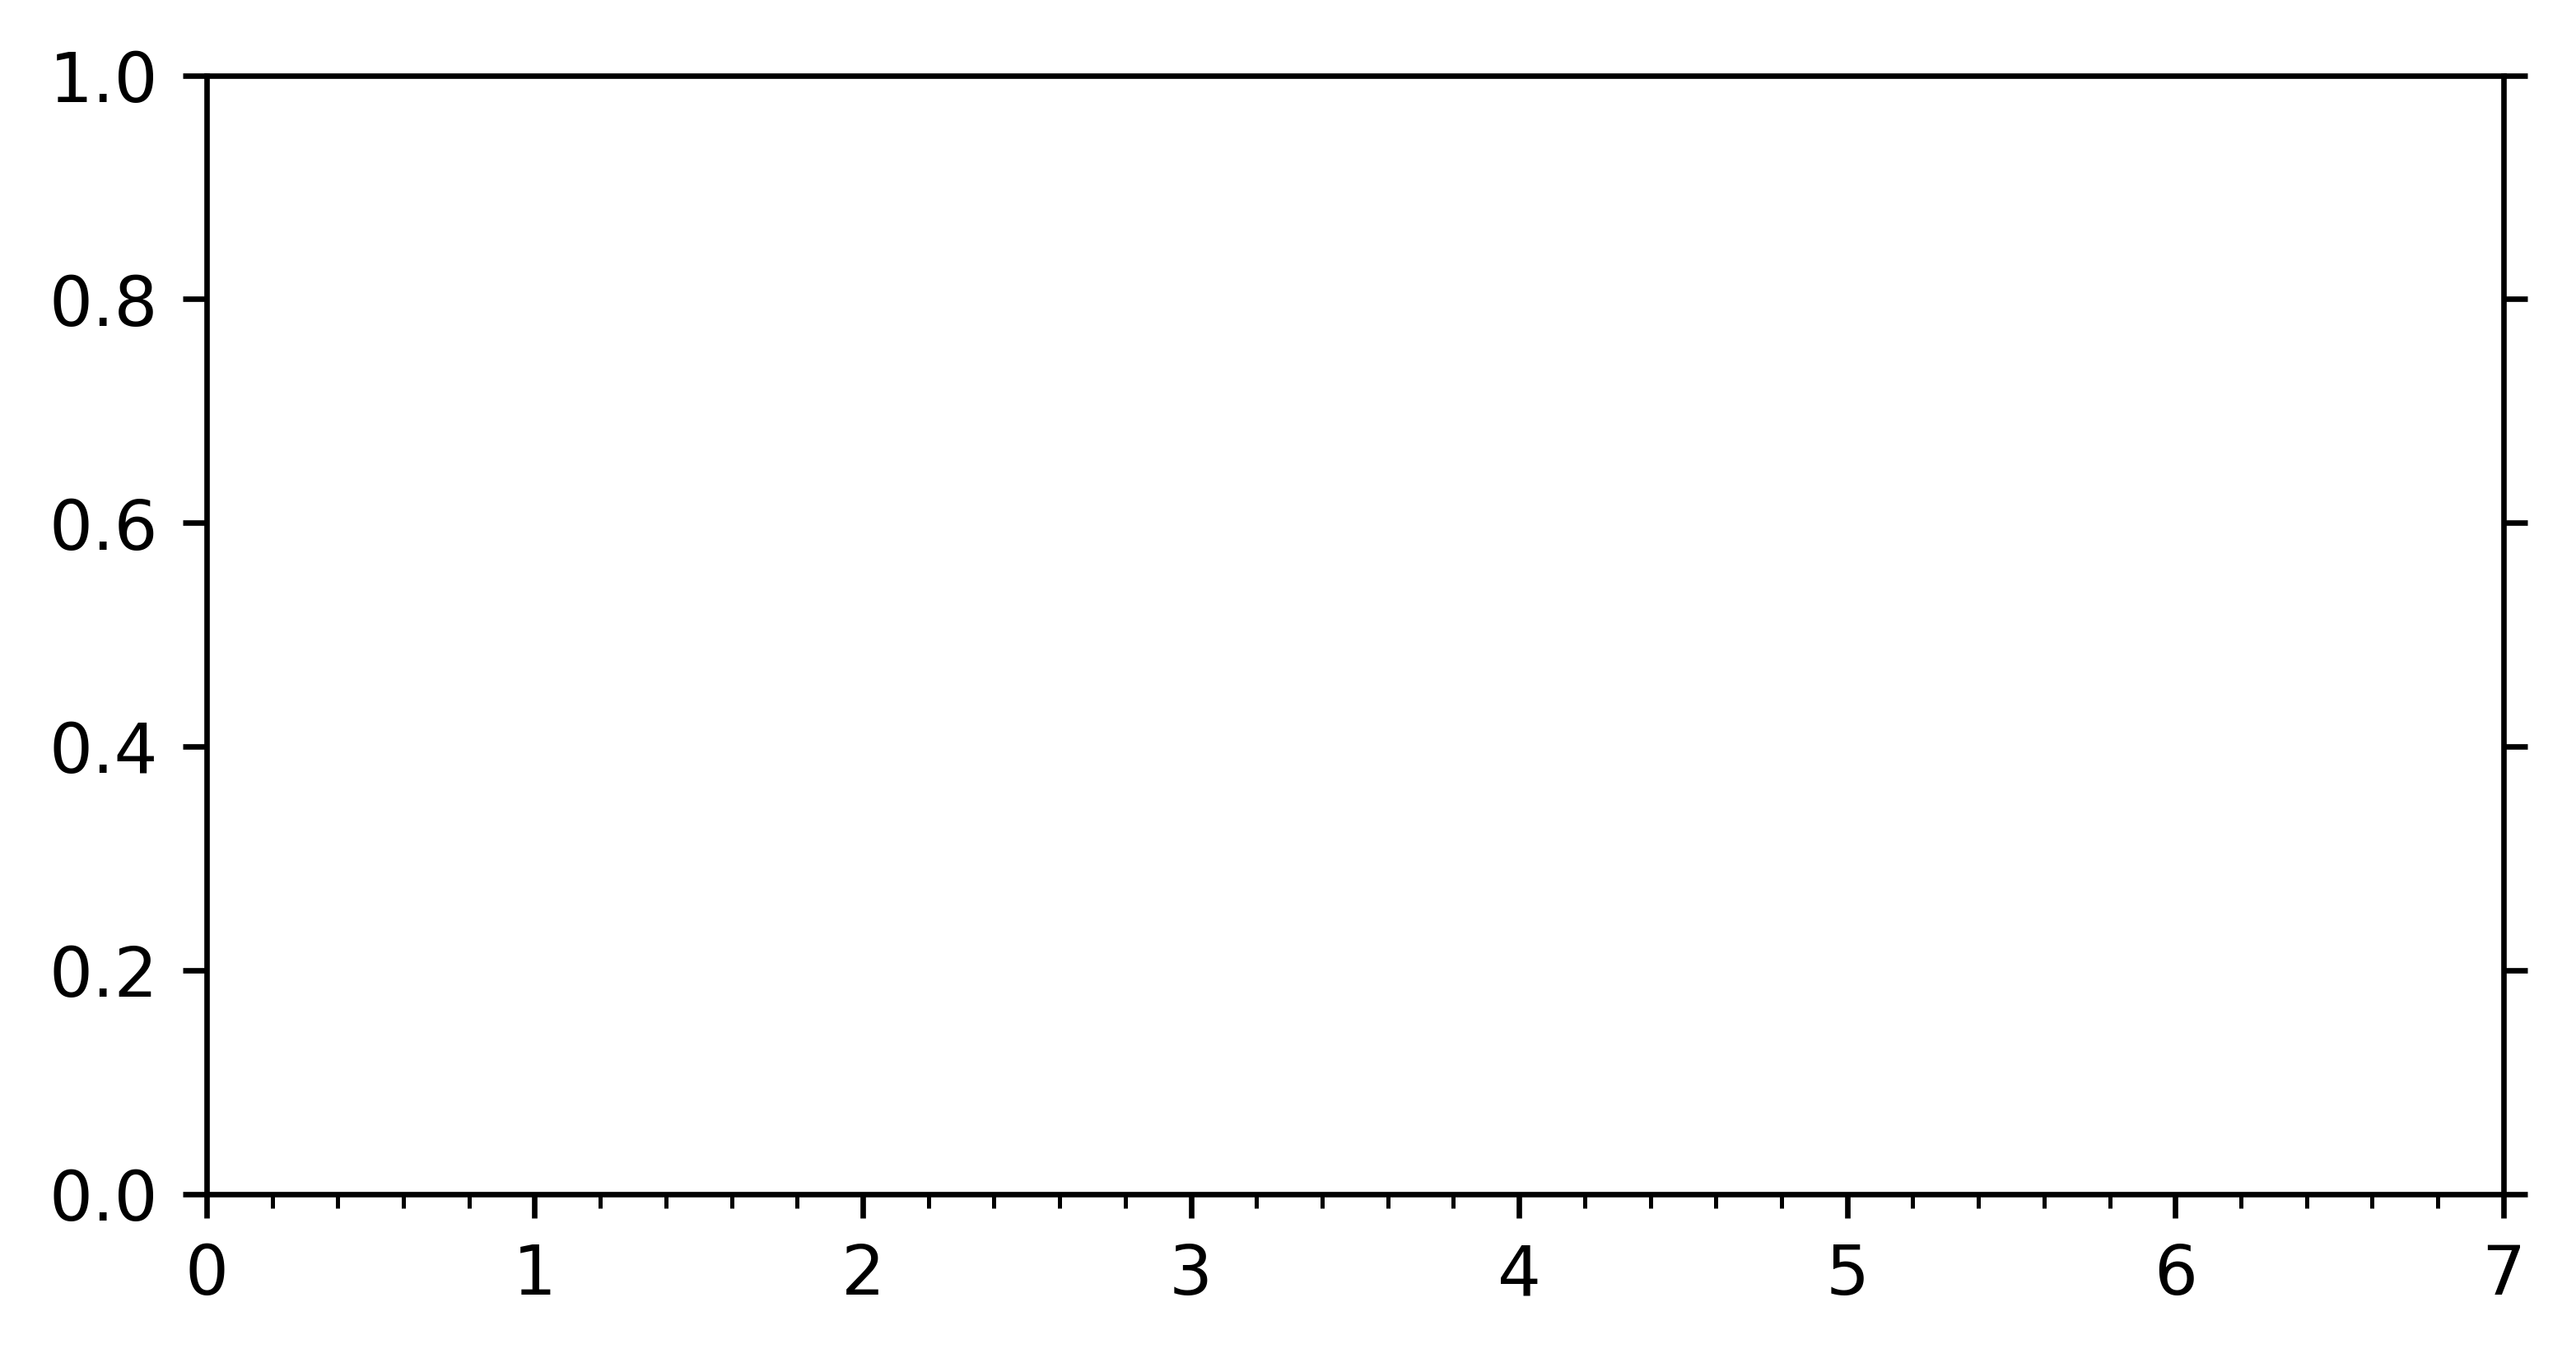

In [22]:
fig=plt.figure(figsize=(6,3),dpi=600)
plt.plot(Data[0][2], label = 'Raw Moved')
plt.plot(Average, label = 'Smoothed Moved')
plt.show()

In [13]:
WvltFam = pywt.families()
Wvlts = []
for Fam in WvltFam:
    temp = pywt.wavelist(Fam)
    for wvlt in temp:
        Wvlts.append(wvlt)


In [14]:
result = Parallel(n_jobs=num_cores)(delayed(TestWavelet)([wvlt, Average]) for wvlt in Wvlts)

/sciclone/home20/dchendrickson01/.conda/envs/tfcgpu/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)
/sciclone/home20/dchendrickson01/.conda/envs/tfcgpu/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)
/sciclone/home20/dchendrickson01/.conda/envs/tfcgpu/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)
/sciclone/home20/dchendrickson01/.conda/envs/tfcgpu/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  return new.astype(intype)
/sciclone/home20/dchendrickson01/.conda/envs/tfcgpu/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:137: ComplexWarning: Ca

In [15]:
length = np.shape(Average)[0]
justifier = np.ones((length, np.shape(Average)[1]))
average = np.zeros(length)
for i in range(length):
    average[i]= np.average(Average[i,:])
justifier = justifier.T * average.T
Average = Average - justifier.T

IndexError: tuple index out of range

In [ ]:
t = TestWavelet(['gaus2',Average])

In [ ]:
scales = 1000
slices = 5
wvlt = 'gaus2'

temp = getThumbprint(Average, wvt=wvlt, ns=scales, numslices=slices)
title = wvlt + ' -test'


In [ ]:
np.max(temp)

In [ ]:
temp2 = PlotFingerPrint([temp, title])